## とにかくまずGoogle colabにはいったら、上のメニューから「ランタイム」→「ランタイムのタイプを変更」→「ハードウェアアクセラレータ」をGPUにする→保存、をしてください。これでGPUが使えるようになります。
## あとは、下のセル移行をShift+Enterを連打してください。
どうやらGPUは一回目の起動時は遅いみたいですので、# Calculationのところは２回実行したほうがきれいな結果が出るかもです。

In [1]:
import numpy as np
import cupy as cp
import time
import matplotlib.pyplot as plt

In [2]:
# Define functions

NREPEAT = 100

# CPU ForLoop
def cpu_forloop(N):
    if N>1000:
        time1=100
    else:
        Jij = np.random.random([N,N])
        x = np.random.random(N)
        y = np.zeros(N)
        time0 = time.time()
        for i in range(NREPEAT):
            for k in range(N):
                buf = 0
                for kk in range(N):
                    buf+= Jij[k,kk] * x[kk] 
                y[k] = np.tanh( buf )
        time1 = time.time()-time0
    print(N, time1)
    return time1

# CPU matrix
def cpu_matrix(N):
    if N>10000:
        time1=100
    else:
        Jij = np.random.random([N,N])
        x = np.random.random(N)
        time0 = time.time()
        for i in range(NREPEAT):
            y = np.tanh( Jij @ x  )
        time1 = time.time()-time0
    print(N, time1)
    return time1

# GPU matrix
def gpu_matrix(N):
    if N>10000:
        time1=100
    else:
        Jij = cp.random.random([N,N])
        x = cp.random.random(N)
        time0 = time.time()
        for i in range(NREPEAT):
            y = cp.tanh( Jij @ x  )
        time1 = time.time()-time0
    print(N, time1)
    return time1


1 0.0
1 0.0
1 0.0069811344146728516
0 / 8
3 0.0
3 0.0009970664978027344
3 0.004019975662231445
1 / 8
10 0.00399017333984375
10 0.0
10 0.003988027572631836
2 / 8
31 0.027924537658691406
31 0.0009984970092773438
31 0.0039937496185302734
3 / 8
100 0.2802155017852783
100 0.01002645492553711
100 0.003989219665527344
4 / 8
316 2.5023741722106934
316 0.010242700576782227
316 0.003988981246948242
5 / 8
1000 27.90177059173584
1000 0.01251220703125
1000 0.0049877166748046875
6 / 8
3162 100
3162 0.23791813850402832
3162 0.003988504409790039
7 / 8
10000 100
10000 2.5038132667541504
10000 0.004987239837646484
8 / 8


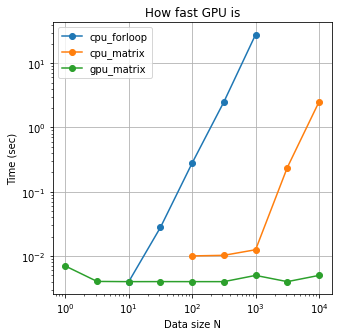

In [4]:
# Calculation

Narray = np.arange(0,4.1,0.5)
t_results = np.zeros([Narray.shape[0], 3])

for i in range(Narray.shape[0]):
    N = int(10**Narray[i])
    t_results[i,0] = cpu_forloop(N)
    t_results[i,1] = cpu_matrix(N)
    t_results[i,2] = gpu_matrix(N)
    print(f'{i} / {Narray.shape[0]-1}')

# Graph
x = 10**Narray
y = t_results.copy()
y[y<0.001] = np.nan
y[y>=100] = np.nan

plt.figure(figsize=(5,5))
plt.plot(x, y[:,0], 'o-', label="cpu_forloop")
plt.plot(x, y[:,1], 'o-', label="cpu_matrix")
plt.plot(x, y[:,2], 'o-', label="gpu_matrix")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Data size N')
plt.ylabel('Time (sec)')
plt.title('How fast GPU is')
plt.legend()
plt.grid()
